# Dive Prediction - Hidden Markov Model

*Predicting Seabird Diving Behaviour from GPS data*

This notebook trains a HMM to predict seabirds' dives.

HMM' characteristics:

* *Number of modes* : 3

<div class="alert alert-info">
 ⚠️ Notebook using R
</div>

In [1]:
library(momentuHMM)
library(pracma)
library(lubridate)

momentuHMM 1.5.1 (2020-03-04)

Warning message in print.momentuHMM.version():
“  A newer version (1.5.2) is available from CRAN”

Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date




In [3]:
options(stringsAsFactors = FALSE)

data_test = read.table("./../data/SS_test.csv", sep = ',', header = TRUE)
data_test$datetime <- as.POSIXct(data_test$datetime, tz = 'GMT')

In [4]:
# ## 
# resolution = 30

In [5]:
# ## Resample at Resolution
# data_test_new <- data.frame()

# for (id in unique(data_test$trip)){
#     t <- data_test[data_test$trip == id,]
    
#     idx = seq(1, nrow(t), by = resolution)
#     traj <- t[idx,c("trip", "datetime", "lon", "lat")]
    
#     # dives as maximum in window 
#     traj$dive = sapply(idx, function(i){
#             max(t$dive[i:(i+resolution-1)], na.rm = TRUE)
#         })
    
#     traj$gaps = sapply(idx, function(i){
#         mean((t$gaps[i:(i+resolution-1)] == 'True'), na.rm = TRUE)
#     })
    
    
#     data_test_new <- rbind(data_test_new, traj)
# }
# data_test_new

# Fit HMM

In [6]:
# prep data for HMM
# rawData <- data_test_new[,c("trip","lon","lat", "datetime", "dive", "gaps")]
rawData <- data_test[,c("trip","lon","lat", "datetime", "dive", "gaps")]
colnames(rawData) <- c("ID", "lon", "lat", "datetime", "dive", "gaps")
birdData <- prepData(data=rawData, type = "LL", coordNames = c("lon", "lat"))
birdData

ID,step,angle,datetime,dive,gaps,x,y
<fct>,<dbl>,<numeric>,<dttm>,<int>,<dbl>,<dbl>,<dbl>
F0915_14_SS_T1,0.10690577,NA,2015-10-01 04:32:29,0,0,-32.39189,-3.817312
F0915_14_SS_T1,0.12028930,-0.284102721,2015-10-01 04:32:44,0,0,-32.39102,-3.816898
F0915_14_SS_T1,0.10566154,-0.065887319,2015-10-01 04:32:59,0,0,-32.38995,-3.816727
F0915_14_SS_T1,0.10469163,0.094215520,2015-10-01 04:33:14,0,0,-32.38900,-3.816639
F0915_14_SS_T1,0.09857028,0.299035768,2015-10-01 04:33:29,0,0,-32.38808,-3.816464
F0915_14_SS_T1,0.10671750,0.509352628,2015-10-01 04:33:44,0,0,-32.38729,-3.816048
F0915_14_SS_T1,0.09576552,-0.261135873,2015-10-01 04:33:59,0,0,-32.38677,-3.815239
F0915_14_SS_T1,0.09062460,-0.259267174,2015-10-01 04:34:14,0,0,-32.38613,-3.814659
F0915_14_SS_T1,0.09870759,-0.179479364,2015-10-01 04:34:29,0,0,-32.38540,-3.814285


## 3 states with gaps

In [7]:
# parameters initialization
## cluster K-Means for initialization
### STEP
clusterBird_step <- kmeans(na.omit(data.frame(birdData$step)), 3)
muS_1 <- max(clusterBird_step$centers)
muS_2 <- median(clusterBird_step$centers) 
muS_3 <- min(clusterBird_step$centers) 
sdS_1 <- sd(na.omit(birdData$step)[clusterBird_step[[1]] == which(clusterBird_step$centers == max(clusterBird_step$centers))])
sdS_2 <- sd(na.omit(birdData$step)[clusterBird_step[[1]] == which(clusterBird_step$centers == median(clusterBird_step$centers))])
sdS_3 <- sd(na.omit(birdData$step)[clusterBird_step[[1]] == which(clusterBird_step$centers == min(clusterBird_step$centers))])

### ANGLE
## for von mises
kappaA_1 <- 4
kappaA_2 <- 2
kappaA_3 <- 0.1

# ### GAPS
# ## Bernouilli
# p_1 <- 0.8
# p_2 <- 0.2
# p_3 <- 0.2

### ZERO MASS
zeroMass <- length(which(birdData$step == 0))/nrow(birdData) #we need to include zeroMass parameters

### FIT MODEL
stateNames <- c("fly","observe", "dive")
dist = list(step = "gamma", angle = "vm")

anglePar0 <- c(kappaA_1, kappaA_2, kappaA_3) 
stepPar0 <- c(muS_1, muS_2, muS_3, sdS_1, sdS_2, sdS_3, zeroMass, zeroMass, zeroMass)
# gapsPar0 <-  c(p_1, p_3) 

# formula for transition probabilities
formula <- ~ gaps
# formula <- ~ 1

In [8]:
m <- fitHMM(data = birdData, nbStates = 3, dist = dist,
            Par0 = list(step = stepPar0, angle = anglePar0), stateNames = stateNames,
            formula = formula)


Fitting HMM with 3 states and 2 data streams

-----------------------------------------------------------------------


 step ~ gamma(mean=~1, sd=~1, zeromass=~1)

 angle ~ vm(concentration=~1)


 Transition probability matrix formula: ~gaps


 Initial distribution formula: ~1


DONE



In [16]:
data <- m$data
prob = stateProbs(m)
data$prediction = prob[, 'observe']

In [17]:
TP <- NULL
FP <- NULL
for (p in unique(data$prediction)){
    all_estim <- 1*(data$prediction > p)
    
    true_positive <- mean(all_estim[data$dive == 1])
    true_negative <- 1-mean(all_estim[data$dive == 0])
    
    TP <- c(TP,true_positive)
    FP <- c(FP,1-true_negative)
}

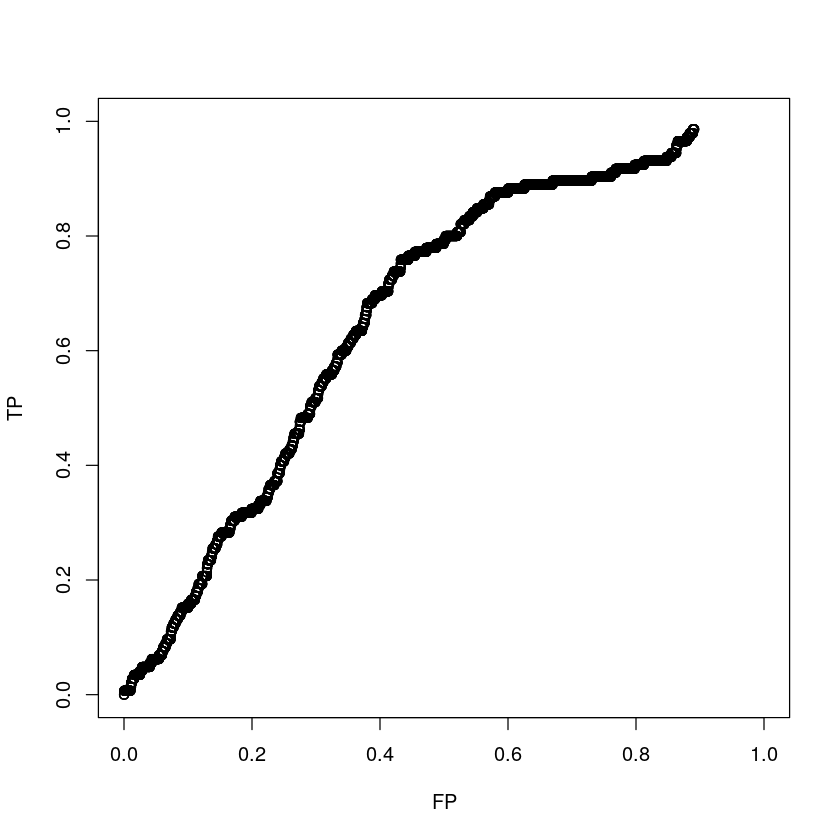

In [18]:
plot(FP,TP, xlim = c(0,1), ylim = c(0,1))

In [12]:
write.table(data, file = paste0('./../results/SS_hmm.csv'), sep = ',', row.names = FALSE)

# Dive Prediction

In [ ]:
for (trip in unique(rawData$ID)){
#   path = paste0('./../results/hmm/figures/', trip, '_', resolution,'s_GNP.png')
#   png(path)
  plot(m, animals = trip, ask = FALSE)
#   dev.off()
}

## compute loss

In [ ]:
loss <- function(x,y,weight){
    x[x == 0] <- 1e-5
    x[x == 1] <- 1-1e-5
    return(-mean(weight*y*log(x) + (1-y)*log(1-x)))
}

In [ ]:
loss(data$prediction, data$dive, 30)